# 데이터시각화특강 기말평가 답안 (문제7)
## 202055364 황성윤

## 7. 대한민국 출산율 (20점)

다음을 잘 읽고 적절한 시각화 플랏을 제시하라. (판다스 backend를 이용하여 시각화 하며, backend 엔진은 `matplotlib`, `plotly` 중 택하여 시각화)

`(1)` 아래는 "2020년 행정구역별 출생아 수, 출생률, 출산율 통계"를 나타낸 표이다. 행정구역별 출생자수를 pie chart로 시각화하라.

In [1]:
import pandas as pd
import numpy as np
import folium
import json
import requests
import plotly.express as px
from IPython.display import HTML

In [2]:
df1=pd.read_html('https://ko.wikipedia.org/wiki/%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD%EC%9D%98_%EC%9D%B8%EA%B5%AC')[17]
df1

,지역,출생아 수(천명),조출생률,합계출산율,거주인구(2021년 주민등록 인구)
0,서울,47.4,5.0,0.64,9588711
1,부산,15.1,4.5,0.75,3369704
2,대구,11.2,4.6,0.81,2406296
3,대전,7.5,5.1,0.81,1457619
4,광주,7.3,5.1,0.81,1444787
5,인천,16.0,5.5,0.83,2936214
6,경기도,77.8,5.9,0.88,13479798
7,전라북도,8.2,4.5,0.91,1796331
8,경상남도,16.8,5.1,0.95,3329623
9,충청북도,8.6,5.4,0.98,1596303


In [3]:
df1['지역']

0           서울
1           부산
2           대구
3           대전
4           광주
5           인천
6          경기도
7         전라북도
8         경상남도
9         충청북도
10          울산
11        경상북도
12         제주도
13        충청남도
14         강원도
15        전라남도
16          세종
17    대한민국(전체)
Name: 지역, dtype: object

In [4]:
df1['province']=['Seoul','Busan','Daegu','Daejeon','Gwangju','Incheon','Gyeonggi-do','Jeollabuk-do',
 'Gyeongsangnam-do','Chungcheongbuk-do','Ulsan','Gyeongsangbuk-do','Jeju-do','Chungcheongnam-do',
 'Gangwon-do','Jeollanam-do','Sejongsi','Total']

In [5]:
df1.iloc[:17,:].iloc[:,[1,5]].rename(columns={'출생아 수(천명)':'birth'}).set_index('province')

,birth
province,
Seoul,47.4
Busan,15.1
Daegu,11.2
Daejeon,7.5
Gwangju,7.3
Incheon,16.0
Gyeonggi-do,77.8
Jeollabuk-do,8.2
Gyeongsangnam-do,16.8


<AxesSubplot:ylabel='birth'>

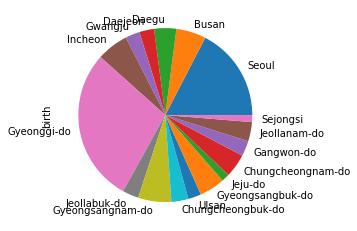

In [6]:
df1.iloc[:17,:].iloc[:,[1,5]].rename(columns={'출생아 수(천명)':'birth'}).set_index('province').\
plot.pie(y='birth',legend=False)

`(2)` 아래는 "2001-2019 지역별 합계출산율"을 정리한 데이터이다. (1)의 데이터프레임과 결합하여 "2001-2020 지역별 합계출산율" 데이터를 만들고 lineplot을 이용하여 시각화하라. (x축은 년도, y축은 합계출산율, 지역은 색깔로 구분하여 시각화할 것)

In [7]:
df2=pd.read_html('https://ko.wikipedia.org/wiki/%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD%EC%9D%98_%EC%9D%B8%EA%B5%AC')[18]
df2

,Unnamed: 0,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001
0,전국,0.918,0.977,1.052,1.172,1.239,1.205,1.187,1.297,1.244,1.226,1.149,1.192,1.259,1.132,1.085,1.164,1.191,1.178,1.309
1,서울특별시,0.717,0.761,0.836,0.940,1.001,0.983,0.968,1.059,1.014,1.015,0.962,1.010,1.068,0.980,0.932,1.015,1.014,1.006,1.111
2,부산광역시,0.827,0.899,0.976,1.095,1.139,1.090,1.049,1.135,1.078,1.045,0.940,0.980,1.024,0.915,0.887,0.953,0.988,0.975,1.103
3,대구광역시,0.932,0.987,1.067,1.186,1.216,1.169,1.127,1.217,1.146,1.109,1.029,1.072,1.137,1.011,1.001,1.087,1.116,1.076,1.216
4,인천광역시,0.940,1.006,1.007,1.144,1.216,1.212,1.195,1.301,1.232,1.214,1.143,1.186,1.257,1.116,1.075,1.158,1.213,1.185,1.324
5,광주광역시,0.913,0.972,1.053,1.168,1.207,1.199,1.170,1.295,1.234,1.223,1.137,1.198,1.262,1.152,1.105,1.203,1.278,1.264,1.421
6,대전광역시,0.883,0.952,1.075,1.192,1.277,1.250,1.234,1.315,1.261,1.205,1.156,1.215,1.274,1.158,1.107,1.181,1.221,1.207,1.330
7,울산광역시,1.084,1.131,1.261,1.418,1.486,1.437,1.391,1.481,1.393,1.369,1.308,1.338,1.403,1.242,1.186,1.241,1.280,1.242,1.423
8,세종특별자치시,1.472,1.566,1.668,1.821,1.893,1.354,1.435,1.597,-,-,-,-,-,-,-,-,-,-,-
9,경기도,0.943,1.002,1.069,1.194,1.272,1.241,1.226,1.355,1.314,1.309,1.226,1.285,1.361,1.239,1.183,1.280,1.321,1.305,1.437


In [8]:
_df1=df1.iloc[:17,:].sort_values('지역').reset_index(drop=True).iloc[:,[0,3]].rename(columns={'합계출산율':'2020'})
_df1

,지역,2020
0,강원도,1.04
1,경기도,0.88
2,경상남도,0.95
3,경상북도,1.00
4,광주,0.81
5,대구,0.81
6,대전,0.81
7,부산,0.75
8,서울,0.64
9,세종,1.28


In [9]:
_df2=df2.replace('-','0').rename(columns={'Unnamed: 0':'지역'}).set_index('지역').applymap(lambda x: float(x)).\
reset_index().iloc[1:,:].sort_values('지역').reset_index(drop=True)
_df2

,지역,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001
0,강원도,1.082,1.067,1.123,1.237,1.311,1.248,1.249,1.374,1.338,1.313,1.248,1.253,1.356,1.202,1.188,1.261,1.279,1.317,1.413
1,경기도,0.943,1.002,1.069,1.194,1.272,1.241,1.226,1.355,1.314,1.309,1.226,1.285,1.361,1.239,1.183,1.280,1.321,1.305,1.437
2,경상남도,1.046,1.122,1.227,1.358,1.437,1.409,1.367,1.503,1.446,1.413,1.323,1.368,1.434,1.254,1.189,1.266,1.290,1.272,1.417
3,경상북도,1.089,1.167,1.256,1.396,1.464,1.408,1.379,1.489,1.434,1.377,1.274,1.313,1.369,1.208,1.173,1.203,1.253,1.232,1.402
4,광주광역시,0.913,0.972,1.053,1.168,1.207,1.199,1.170,1.295,1.234,1.223,1.137,1.198,1.262,1.152,1.105,1.203,1.278,1.264,1.421
5,대구광역시,0.932,0.987,1.067,1.186,1.216,1.169,1.127,1.217,1.146,1.109,1.029,1.072,1.137,1.011,1.001,1.087,1.116,1.076,1.216
6,대전광역시,0.883,0.952,1.075,1.192,1.277,1.250,1.234,1.315,1.261,1.205,1.156,1.215,1.274,1.158,1.107,1.181,1.221,1.207,1.330
7,부산광역시,0.827,0.899,0.976,1.095,1.139,1.090,1.049,1.135,1.078,1.045,0.940,0.980,1.024,0.915,0.887,0.953,0.988,0.975,1.103
8,서울특별시,0.717,0.761,0.836,0.940,1.001,0.983,0.968,1.059,1.014,1.015,0.962,1.010,1.068,0.980,0.932,1.015,1.014,1.006,1.111
9,세종특별자치시,1.472,1.566,1.668,1.821,1.893,1.354,1.435,1.597,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [10]:
df3=pd.concat([_df1,_df2.iloc[:,1:]],axis=1).set_index('지역').applymap(lambda x: float(x)).reset_index().\
set_index('지역').T.reset_index().rename(columns={'index':'year'}).\
sort_values('year').reset_index(drop=True).set_index('year').T.reset_index()
df3

year,지역,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,강원도,1.413,1.317,1.279,1.261,1.188,1.202,1.356,1.253,1.248,...,1.338,1.374,1.249,1.248,1.311,1.237,1.123,1.067,1.082,1.04
1,경기도,1.437,1.305,1.321,1.280,1.183,1.239,1.361,1.285,1.226,...,1.314,1.355,1.226,1.241,1.272,1.194,1.069,1.002,0.943,0.88
2,경상남도,1.417,1.272,1.290,1.266,1.189,1.254,1.434,1.368,1.323,...,1.446,1.503,1.367,1.409,1.437,1.358,1.227,1.122,1.046,0.95
3,경상북도,1.402,1.232,1.253,1.203,1.173,1.208,1.369,1.313,1.274,...,1.434,1.489,1.379,1.408,1.464,1.396,1.256,1.167,1.089,1.00
4,광주,1.421,1.264,1.278,1.203,1.105,1.152,1.262,1.198,1.137,...,1.234,1.295,1.170,1.199,1.207,1.168,1.053,0.972,0.913,0.81
5,대구,1.216,1.076,1.116,1.087,1.001,1.011,1.137,1.072,1.029,...,1.146,1.217,1.127,1.169,1.216,1.186,1.067,0.987,0.932,0.81
6,대전,1.330,1.207,1.221,1.181,1.107,1.158,1.274,1.215,1.156,...,1.261,1.315,1.234,1.250,1.277,1.192,1.075,0.952,0.883,0.81
7,부산,1.103,0.975,0.988,0.953,0.887,0.915,1.024,0.980,0.940,...,1.078,1.135,1.049,1.090,1.139,1.095,0.976,0.899,0.827,0.75
8,서울,1.111,1.006,1.014,1.015,0.932,0.980,1.068,1.010,0.962,...,1.014,1.059,0.968,0.983,1.001,0.940,0.836,0.761,0.717,0.64
9,세종,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,1.597,1.435,1.354,1.893,1.821,1.668,1.566,1.472,1.28


In [24]:
fig=df3.melt(id_vars='지역').rename(columns={'variable':'year','value':'birth rate'}).\
plot.line(x='year', y='birth rate', color='지역', facet_col='지역', 
          facet_col_wrap=2, facet_col_spacing=0.04, backend='plotly', height=3000, width=1000)
fig.update_yaxes(matches=None,showticklabels=True)
#fig.show(config=dict({'scrollZoom':False}))